In [370]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model

%matplotlib inline 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [371]:
nba = pd.read_csv('./nba.csv')
nba_2015_16 = pd.read_csv('./nba2015_16.csv')
nba_2016_17 = pd.read_csv('./nba2016_17.csv')
nba_finals = pd.read_csv('./nba_finals.csv')

In [372]:
nba = nba.iloc[::-1]
nba_2015_16 = nba_2015_16.iloc[::-1]
nba_2016_17 = nba_2016_17.iloc[::-1]

nba.head()

,Rk,Season,Tm,Lg,G,W,L,W/L%,MP,FG,...,ORtg,DRtg,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,ORB%.1,FT/FGA.1
299,300,2005-06,ATL,NBA,82,26,56,0.317,19880,2946,...,106.4,111.6,0.486,14.7,31.4,0.255,0.513,14.1,30.5,0.275
298,299,2005-06,BOS,NBA,82,33,49,0.402,19880,2951,...,105.2,106.9,0.504,15.7,25.5,0.263,0.490,13.8,27.2,0.282
297,298,2005-06,CHA,NBA,82,26,56,0.317,19905,2961,...,102.5,106.7,0.464,13.0,27.1,0.233,0.514,16.5,29.3,0.263
296,297,2005-06,CHI*,NBA,82,41,41,0.500,19905,3004,...,104.0,103.4,0.487,13.9,26.3,0.216,0.464,13.9,25.3,0.295
295,296,2005-06,CLE*,NBA,82,50,32,0.610,19830,2908,...,107.8,105.4,0.492,13.3,28.4,0.263,0.490,12.8,24.3,0.226


In [373]:
nba.isnull().any()

Rk          False
Season      False
Tm          False
Lg          False
G           False
W           False
L           False
W/L%        False
MP          False
FG          False
FGA         False
2P          False
2PA         False
3P          False
3PA         False
FT          False
FTA         False
ORB         False
DRB         False
TRB         False
AST         False
STL         False
BLK         False
TOV         False
PF          False
PTS         False
MOV         False
SOS         False
SRS         False
Pace        False
ORtg        False
DRtg        False
eFG%        False
TOV%        False
ORB%        False
FT/FGA      False
eFG%.1      False
TOV%.1      False
ORB%.1      False
FT/FGA.1    False
dtype: bool

In [374]:
nba.dtypes

Rk            int64
Season       object
Tm           object
Lg           object
G             int64
W             int64
L             int64
W/L%        float64
MP            int64
FG            int64
FGA           int64
2P            int64
2PA           int64
3P            int64
3PA           int64
FT            int64
FTA           int64
ORB           int64
DRB           int64
TRB           int64
AST           int64
STL           int64
BLK           int64
TOV           int64
PF            int64
PTS           int64
MOV         float64
SOS         float64
SRS         float64
Pace        float64
ORtg        float64
DRtg        float64
eFG%        float64
TOV%        float64
ORB%        float64
FT/FGA      float64
eFG%.1      float64
TOV%.1      float64
ORB%.1      float64
FT/FGA.1    float64
dtype: object

In [375]:
csv_list = [nba, nba_2015_16, nba_2016_17, nba_finals]

for ele in csv_list:
    ele['FG_avg'] = ele['FG'] / ele['FGA']
    ele['2P_avg'] = ele['2P'] / ele['2PA']
    ele['3P_avg'] = ele['3P'] / ele['3PA']

    ele['Tm_general'] = ele['Tm'].map(lambda x: x.rstrip('*'))
    ele['playoff'] = ele['Tm'].apply(lambda x: 1 if '*' in x else 0)
    ele['championships'] = 0
#     for season in nba_finals.Season:
#         print(ele.loc[ele['Season']== season]['Tm'] == nba_finals[nba_finals['Season'] == season].Tm.item())
#         ele['championships'] = ele.loc[ele['Season']== season]['Tm'].apply(lambda x: 1 if x == nba_finals[nba_finals['Season'] == season].Tm.item() else 0)

In [284]:
# for season in nba_finals.Season:
#     print(season)
#     nba.loc[nba['Season']==season]['championships'] = 1

teamList = []
seasonList = []
for ele in nba_finals.Tm:
    teamList.append(ele)
for ele in nba_finals.Season:
    seasonList.append(ele)
    
print(teamList, seasonList)

for index, ele in enumerate(teamList):
    print(index, ele, seasonList[index])
    nba.set_value('championships',seasonList[index], 1)
    print(nba[nba['Season']==seasonList[index]][nba['Tm']==ele]['championships'])
    
nba['championships']

['MIA*', 'SAS*', 'BOS*', 'LAL*', 'LAL*', 'DAL*', 'MIA*', 'MIA*', 'SAS*', 'GSW*', 'CLE*', 'GSW*'] ['2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17']
0 MIA* 2005-06
285    0.0
Name: championships, dtype: float64
1 SAS* 2006-07
244    0.0
Name: championships, dtype: float64
2 BOS* 2007-08
238    0.0
Name: championships, dtype: float64
3 LAL* 2008-09
197    0.0
Name: championships, dtype: float64
4 LAL* 2009-10
167    0.0
Name: championships, dtype: float64
5 DAL* 2010-11
144    0.0
Name: championships, dtype: float64
6 MIA* 2011-12
105    0.0
Name: championships, dtype: float64
7 MIA* 2012-13
74    0.0
Name: championships, dtype: float64
8 SAS* 2013-14
33    0.0
Name: championships, dtype: float64
9 GSW* 2014-15
20    0.0
Name: championships, dtype: float64
10 CLE* 2015-16
Series([], Name: championships, dtype: float64)
11 GSW* 2016-17
Series([], Name: championships, dtype: float64)


/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:17: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



299              0.0
298              0.0
297              0.0
296              0.0
295              0.0
294              0.0
293              0.0
292              0.0
291              0.0
290              0.0
289              0.0
288              0.0
287              0.0
286              0.0
285              0.0
284              0.0
283              0.0
282              0.0
281              0.0
280              0.0
279              0.0
278              0.0
277              0.0
276              0.0
275              0.0
274              0.0
273              0.0
272              0.0
271              0.0
270              0.0
                ... 
28               0.0
27               0.0
26               0.0
25               0.0
24               0.0
23               0.0
22               0.0
21               0.0
20               0.0
19               0.0
18               0.0
17               0.0
16               0.0
15               0.0
14               0.0
13               0.0
12           

In [266]:
nba[nba['Season']=='2012-13'][nba['Tm']=='ATL*']['G']


/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



89    82
Name: G, dtype: int64

In [84]:
nba.groupby('Season').mean()['FG']

Season
2005-06    2938.866667
2006-07    2995.333333
2007-08    3055.633333
2008-09    3043.666667
2009-10    3091.000000
2010-11    3054.133333
2011-12    2407.266667
2012-13    3042.733333
2013-14    3092.633333
2014-15    3076.233333
Name: FG, dtype: float64

In [85]:
nba.groupby('Season').mean()['3P']

Season
2005-06    469.533333
2006-07    497.533333
2007-08    537.466667
2008-09    545.066667
2009-10    527.400000
2010-11    529.533333
2011-12    423.100000
2012-13    586.766667
2013-14    635.133333
2014-15    643.333333
Name: 3P, dtype: float64

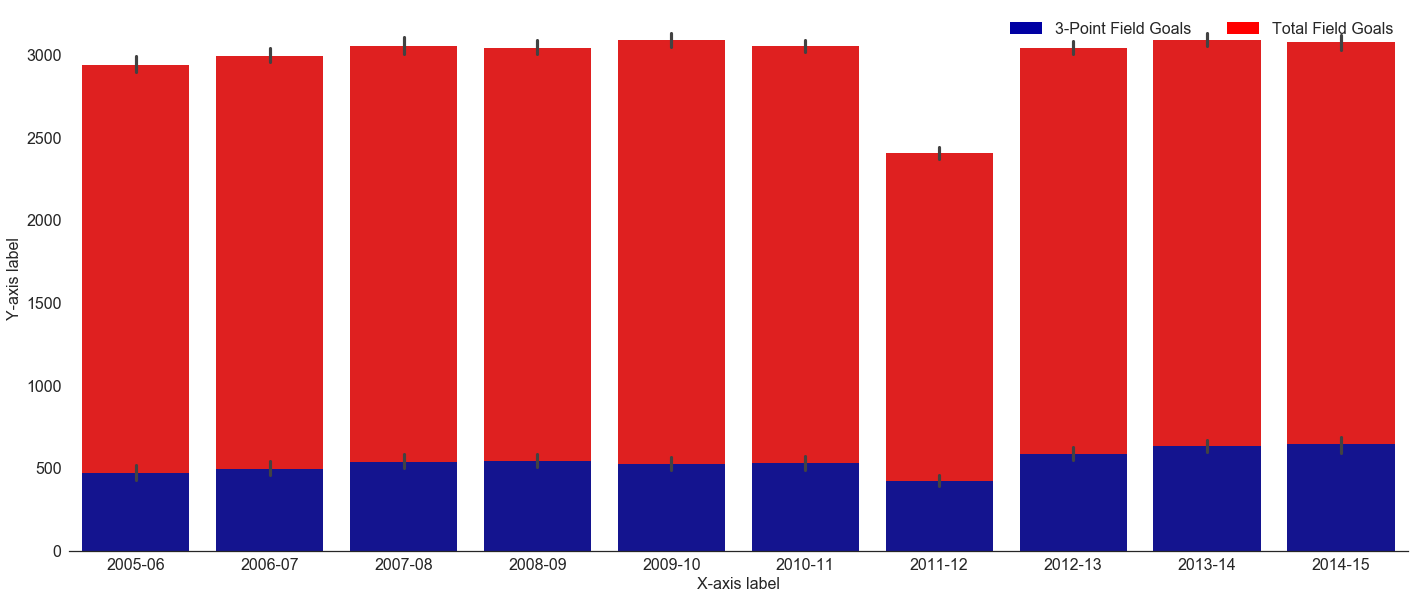

In [86]:
#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = nba['Season'], y = nba['FG'], color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = nba['Season'], y = nba['3P'], color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['3-Point Field Goals ', 'Total Field Goals'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Y-axis label")
bottom_plot.set_xlabel("X-axis label")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

In [298]:
nba['3P%'] = nba['3PA']/nba['FGA']
nba.groupby('Season').mean()['3P%']

Season
2005-06    0.201667
2006-07    0.211992
2007-08    0.221964
2008-09    0.223915
2009-10    0.222050
2010-11    0.221790
2011-12    0.225735
2012-13    0.243586
2013-14    0.259563
2014-15    0.267959
Name: 3P%, dtype: float64

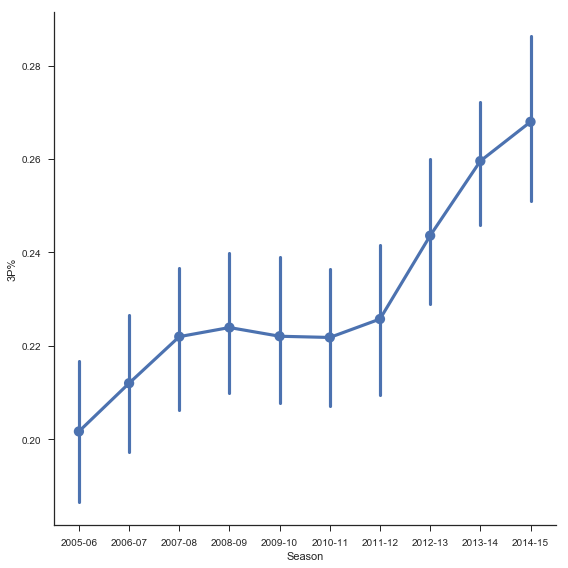

In [299]:
sns.factorplot(data=nba, x="Season", y="3P%", size=8, aspect=1)

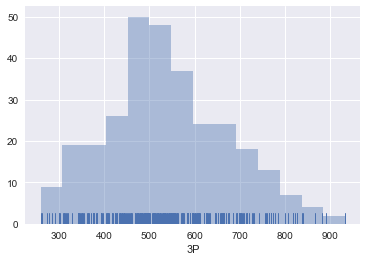

In [7]:
sns.distplot(nba['3P'], kde=False, rug=True);

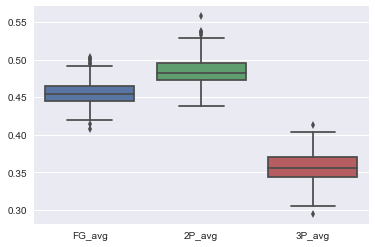

In [8]:
sns.boxplot(data=nba[1:], order=["FG_avg", "2P_avg", "3P_avg"]);

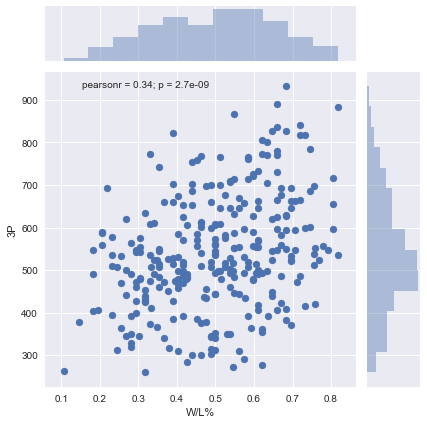

In [9]:
sns.jointplot(x="W/L%", y="3P", data=nba[1:])

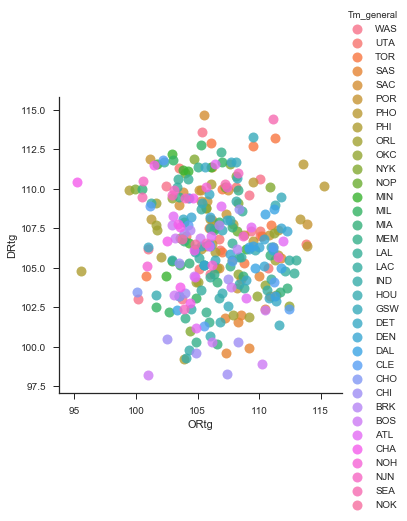

In [10]:
sns.set_style("ticks")

sns.lmplot('ORtg', 'DRtg',
           data=nba,
           fit_reg=False,
           hue="Tm_general",  
           scatter_kws={"marker": "D",
                        "s": 100})

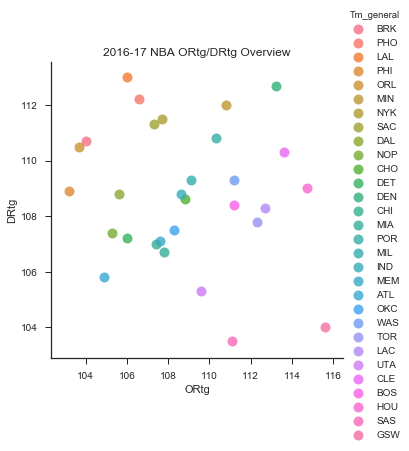

In [255]:
sns.set_style("ticks")
nba['Season'][0]

nba_2014_15 = nba.loc[nba['Season'] == '2014-15']
nba_2014_15
sns.lmplot('ORtg', 'DRtg',
           data=nba_2016_17,
           fit_reg=False,
           hue="Tm_general",  
           scatter_kws={"marker": "D",
                        "s": 100})

plt.title('2016-17 NBA ORtg/DRtg Overview')


In [12]:
nba_2014_15['ORtg']

0     103.7
1     105.1
2     111.0
3     108.5
4     105.3
5     108.2
6     105.3
7      95.5
8     101.6
9     107.8
10     99.9
11    108.2
12    102.9
13    102.7
14    103.9
15    105.7
16    103.4
17    112.4
18    103.5
19    107.0
20    111.6
21    105.3
22    104.5
23    109.5
24    111.1
25    100.1
26    107.5
27    104.4
28    104.7
29    108.9
Name: ORtg, dtype: float64

In [31]:
import plotly.plotly as py
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

slope = 0.0
hover_text = []
bubble_size = []
for index, row in nba_2014_15.iterrows():
    hover_text.append(('Team: {team}<br>'+
                      'ORtg: {ortg}<br>'+
                      'DRtg: {drtg}<br>'+
                      '3P avg: {threepoint_avg}<br>'+
                      'FG avg: {fg_avg}').format(team=row['Tm_general'],
                                            ortg=row['ORtg'],
                                            drtg=row['DRtg'],
                                            threepoint_avg=row['3P_avg'],
                                            fg_avg=row['FG_avg']))
    bubble_size.append(math.sqrt(row['3P']*slope))

nba_2014_15['text'] = hover_text
nba_2014_15['size'] = bubble_size

team_data_list = []
for team in nba_2014_15['Tm_general']:
    trace = go.Scatter(
        x=nba_2014_15['ORtg'][nba_2014_15['Tm_general'] == team],
        y=nba_2014_15['DRtg'][nba_2014_15['Tm_general'] == team],
        mode='markers',
        name=team,
        text=nba_2014_15['text'][nba_2014_15['Tm_general'] == team],
        marker=dict(
            symbol='circle',
            sizemode='diameter',
            sizeref=0.1,
            size=nba_2014_15['size'][nba_2014_15['Tm_general'] == team],
            line=dict(
                width=2
            ),
        )
    )
    team_data_list.append(trace)

layout = go.Layout(
    title='2014-15 NBA ORtg/DRtg Overview',
    xaxis=dict(
        title='ORtg',
        range=[90, 120],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='DRtg',
        range=[90, 120],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data=team_data_list, layout=layout)
iplot(fig)

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [307]:
import plotly.plotly as py
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

slope = 0.02
hover_text = []
bubble_size = []
for index, row in nba_2016_17.iterrows():
    hover_text.append(('Team: {team}<br>'+
                      'ORtg: {ortg}<br>'+
                      'DRtg: {drtg}<br>'+
                      '3P avg: {threepoint_avg}<br>'+
                      'FG avg: {fg_avg}').format(team=row['Tm_general'],
                                            ortg=row['ORtg'],
                                            drtg=row['DRtg'],
                                            threepoint_avg=row['3P_avg'],
                                            fg_avg=row['FG_avg']))
    bubble_size.append(math.sqrt(row['3P']*slope))

nba_2016_17['text'] = hover_text
nba_2016_17['size'] = bubble_size

team_data_list = []
for team in nba_2016_17['Tm_general']:
    trace = go.Scatter(
        x=nba_2016_17['ORtg'][nba_2016_17['Tm_general'] == team],
        y=nba_2016_17['DRtg'][nba_2016_17['Tm_general'] == team],
        mode='markers',
        name=team,
        text=nba_2016_17['text'][nba_2016_17['Tm_general'] == team],
        marker=dict(
            symbol='circle',
            sizemode='diameter',
            sizeref=0.1,
            size=nba_2016_17['size'][nba_2016_17['Tm_general'] == team],
            line=dict(
                width=2
            ),
        )
    )
    team_data_list.append(trace)

layout = go.Layout(
    title='2016-17 NBA ORtg/DRtg Overview',
    xaxis=dict(
        title='ORtg',
        range=[100, 120],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='DRtg',
        range=[100, 114],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data=team_data_list, layout=layout)
iplot(fig)

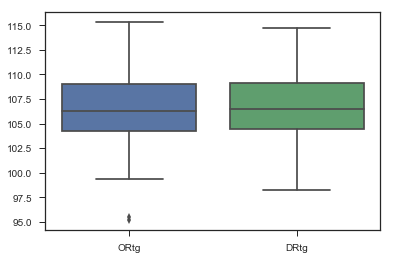

In [80]:
sns.boxplot(data=nba[1:], order=["ORtg", "DRtg"]);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e6e0390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d9da400>]], dtype=object)

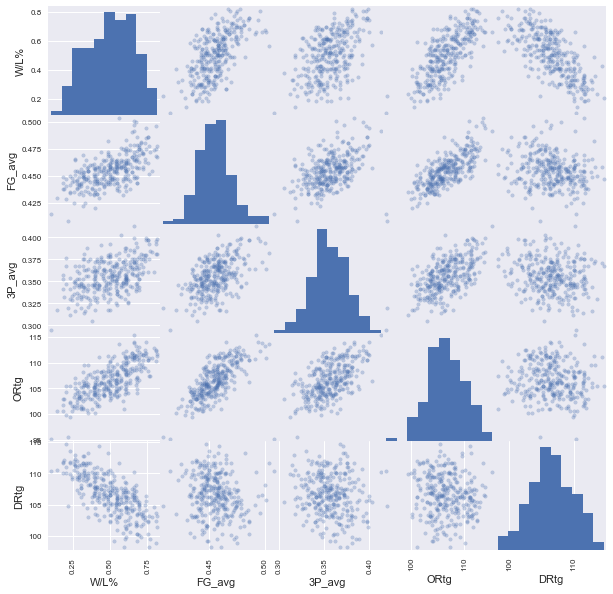

In [62]:
df = nba[['W/L%', 'FG_avg', '3P_avg', 'ORtg', 'DRtg']]
pd.scatter_matrix(df, alpha=0.3, figsize=(10,10), diagonal='hist')

In [309]:
from statsmodels.formula.api import ols


/Applications/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



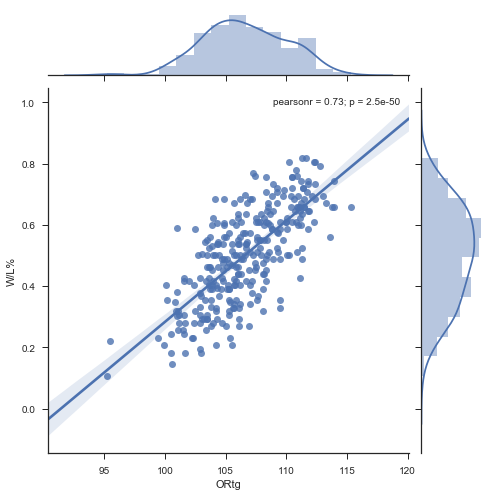

In [311]:
import seaborn # pip install seaborn

seaborn.jointplot(x="ORtg", y="W/L%", data=nba[1:], kind='reg', fit_reg=True, size=7)
plt.show()

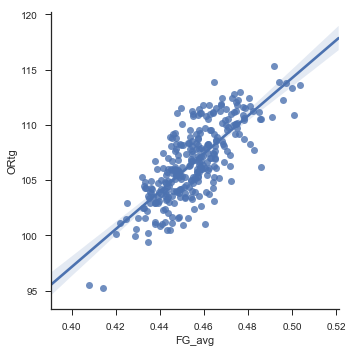

In [312]:
seaborn.lmplot(x="FG_avg", y="ORtg", data=nba)

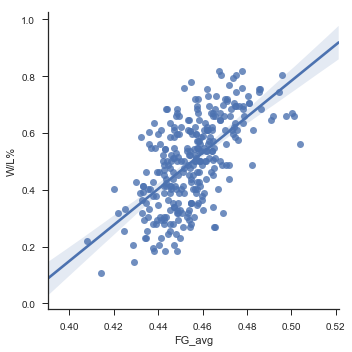

In [313]:
seaborn.lmplot(x="FG_avg", y="W/L%", data=nba)

In [133]:
lr = linear_model.LogisticRegression(C=1e5) # C really matters!
X = nba['W/L%']
y = nba['playoff']

X = X.values.reshape(-1, 1) # Try to comment this line.


lr.fit(X, y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [134]:
print(lr.predict_proba([[5]]))
print(lr.coef_, lr.intercept_)

[[ 0.  1.]]
[[ 38.67539024]] [-19.01058608]


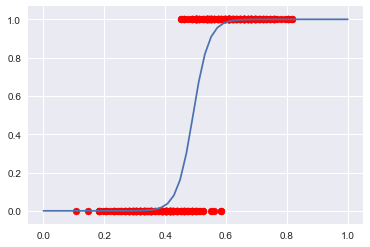

In [135]:
xx = np.linspace(0, 1).reshape(-1, 1)
probs = lr.predict_proba(xx)[:, 1].reshape(xx.shape)

plt.scatter(X.ravel(), y, c='red')
plt.plot(xx, probs)
plt.show()

In [137]:
lr = linear_model.LogisticRegression(C=1e5) # C really matters!
X = nba['W']
y = nba['playoff']

X = X.values.reshape(-1, 1) # Try to comment this line.


lr.fit(X, y)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

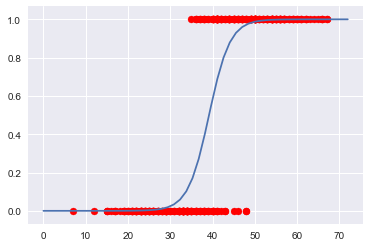

In [139]:
xx = np.linspace(0, 72).reshape(-1, 1)
probs = lr.predict_proba(xx)[:, 1].reshape(xx.shape)

plt.scatter(X.ravel(), y, c='red')
plt.plot(xx, probs)
plt.show()

In [154]:
lr.score(nba_2015_16['W'].values.reshape(-1, 1), nba_2015_16['playoff'])

0.90000000000000002

In [155]:
lr.score(nba_2016_17['W'].values.reshape(-1, 1), nba_2016_17['playoff'])

0.93333333333333335

In [407]:
import numpy as np
from sklearn import datasets

nba_X = nba
nba_y = nba_2015_16
# print(nba_X.iloc[:270]['playoff'])
nba_X_train = pd.Series.as_matrix(nba_X.iloc[:270]['W/L%'])
nba_y_train = pd.Series.as_matrix(nba_X.iloc[:270]['playoff'])
nba_X_test = nba_X.iloc[270:]['W/L%']
nba_y_test = nba_X.iloc[270:]['playoff']

nba_X_train.shape

(270,)

In [409]:
nba_X_train = nba_X_train.reshape(270, 1)
nba_y_train = nba_y_train.reshape(270, 1)
nba_X_test = nba_X_test.reshape(30, 1)
nba_y_test = nba_y_test.reshape(30, 1)

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



In [410]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(nba_X_train, nba_y_train) 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,# p=1: Manhattan distance, p=2: Euclidean distance
                     weights='uniform')

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [411]:
print(nba_X_test)

print(knn.predict(nba_X_test))

[[ 0.732]
 [ 0.488]
 [ 0.463]
 [ 0.61 ]
 [ 0.402]
 [ 0.646]
 [ 0.61 ]
 [ 0.366]
 [ 0.39 ]
 [ 0.817]
 [ 0.683]
 [ 0.463]
 [ 0.683]
 [ 0.256]
 [ 0.671]
 [ 0.451]
 [ 0.5  ]
 [ 0.195]
 [ 0.549]
 [ 0.207]
 [ 0.549]
 [ 0.305]
 [ 0.22 ]
 [ 0.476]
 [ 0.622]
 [ 0.354]
 [ 0.671]
 [ 0.598]
 [ 0.463]
 [ 0.561]]
[1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1]
